# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/train.csv")

In [2]:
# How dataframe looks like
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
# info of types, samples and features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Choeck missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Check percentage of missing values
df.isna().sum()/df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
# Check duplicates
df.duplicated().sum()

0

In [9]:
# Look for garbage values
for object_column in df.select_dtypes("object").columns:
    print(df[object_column].value_counts())
    print("--------"*10)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
--------------------------------------------------------------------------------
Sex
male      577
female    314
Name: count, dtype: int64
--------------------------------------------------------------------------------
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
------------------------------

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Looking for incorect values
print(any(df["PassengerId"] < 0))
print(any(df["Survived"] < 0))
print(any(df["Pclass"] < 0))
print(any(df["Age"] < 0))
print(any(df["SibSp"] < 0))
print(any(df["Parch"] < 0))
print(any(df["Fare"] < 0))

False
False
False
False
False
False
False


## EDA - Exploratory Data Analysis

In [12]:
# numeric distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
df.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


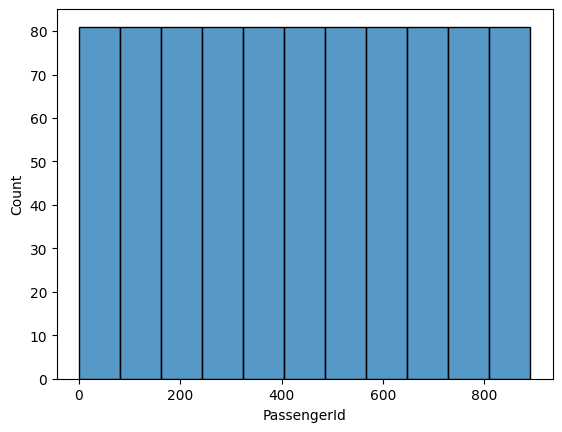

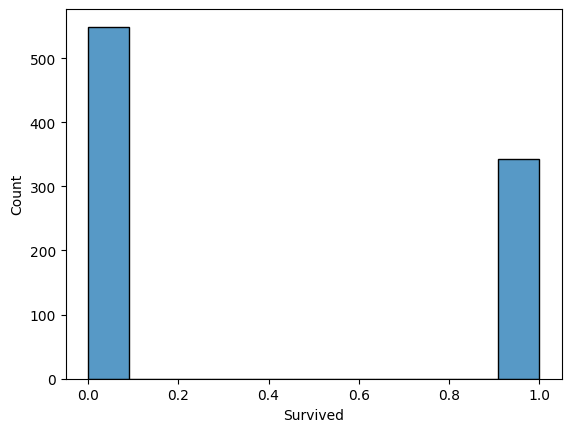

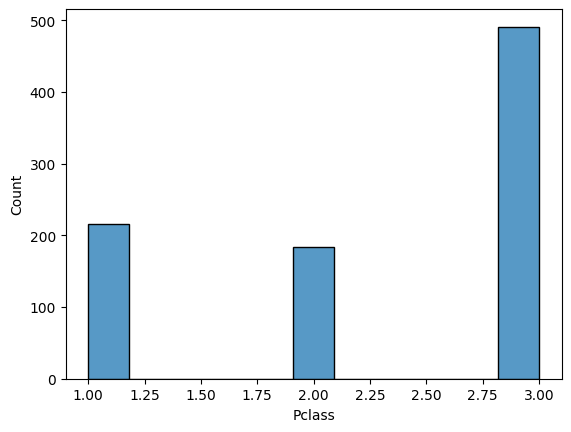

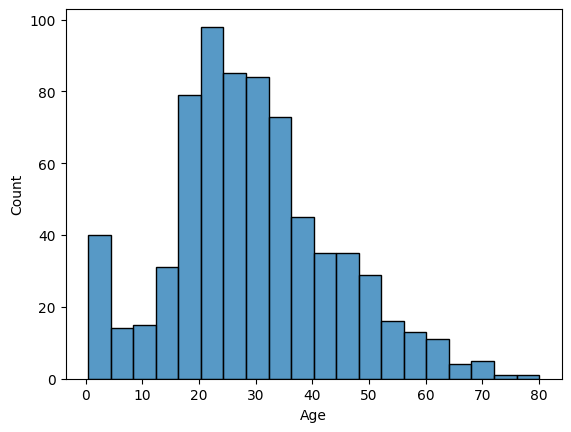

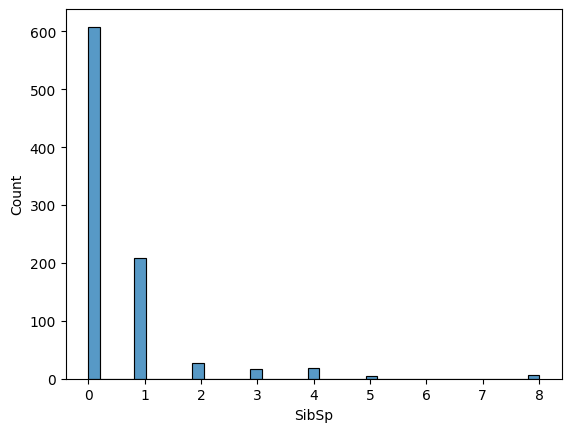

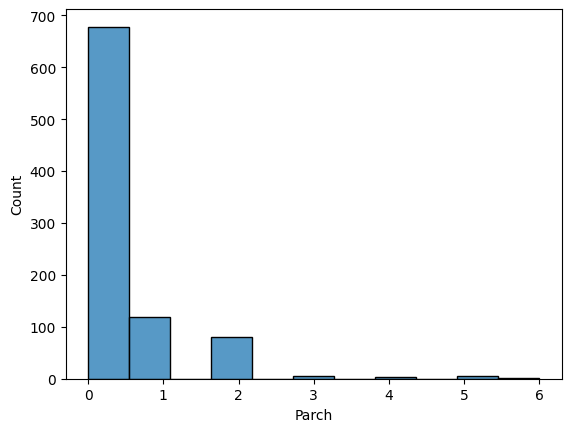

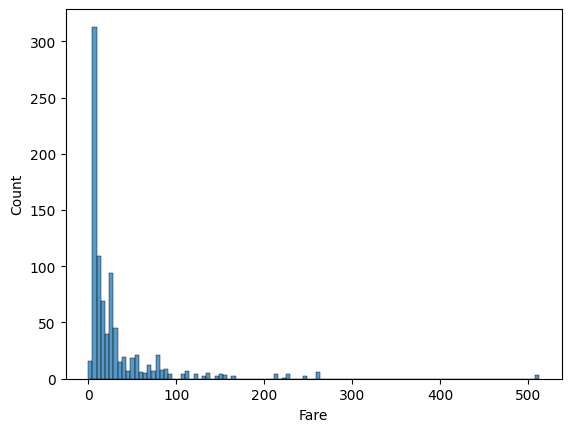

In [14]:
# histograms - data distribution
for column in df.select_dtypes("number").columns:
    sns.histplot(data=df, x=column)
    plt.show()

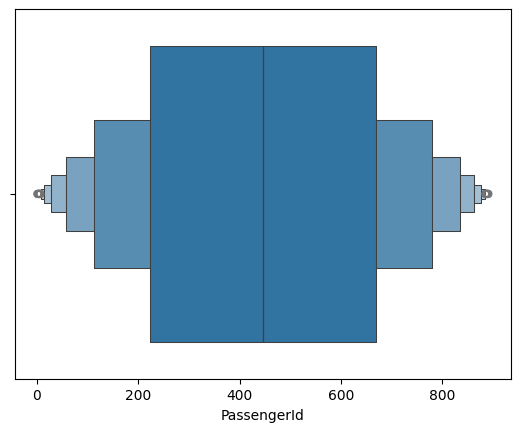

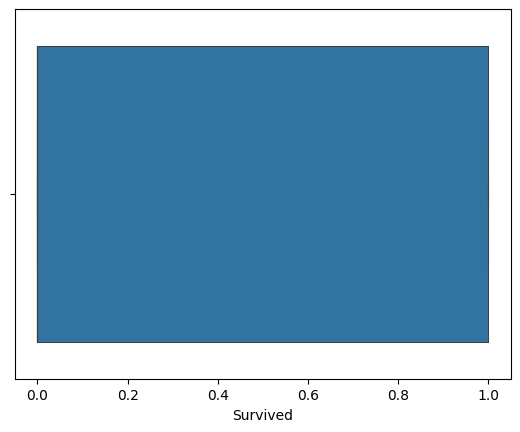

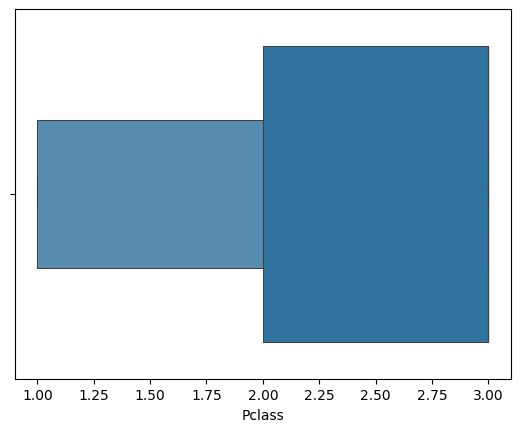

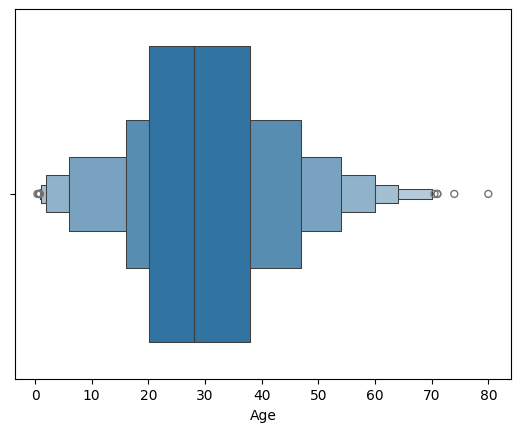

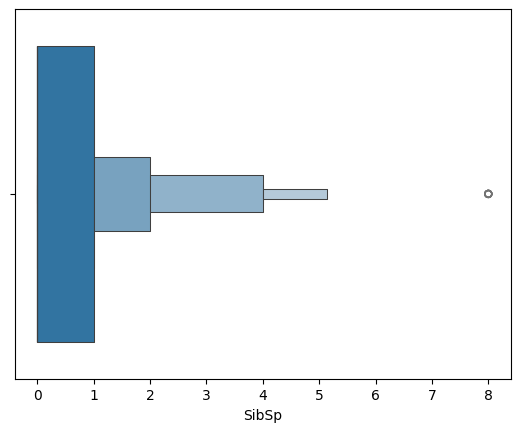

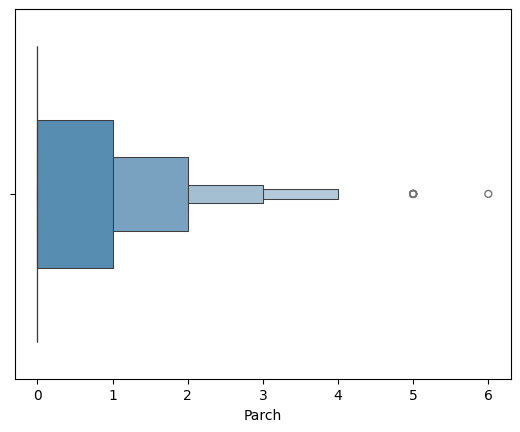

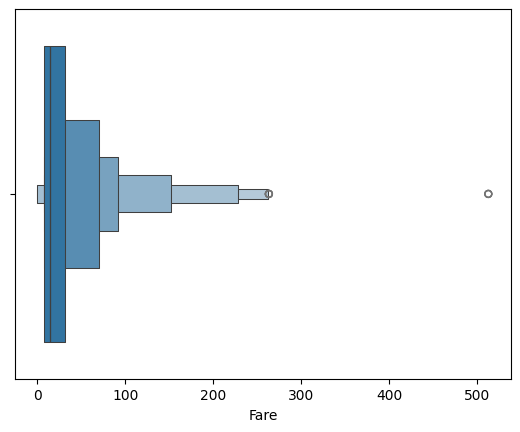

In [15]:
# Box plots - outliers
for column in df.select_dtypes("number").columns:
    sns.boxenplot(data=df, x=column)
    plt.show()

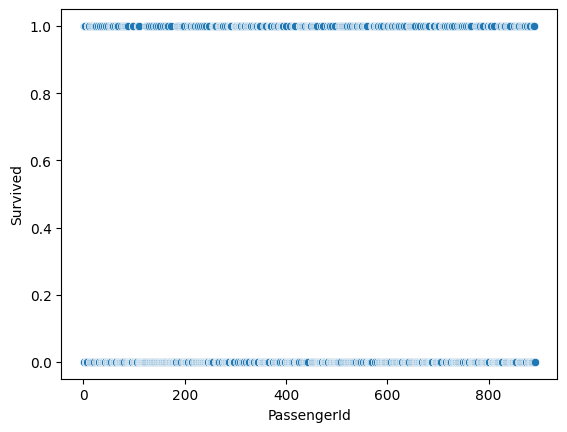

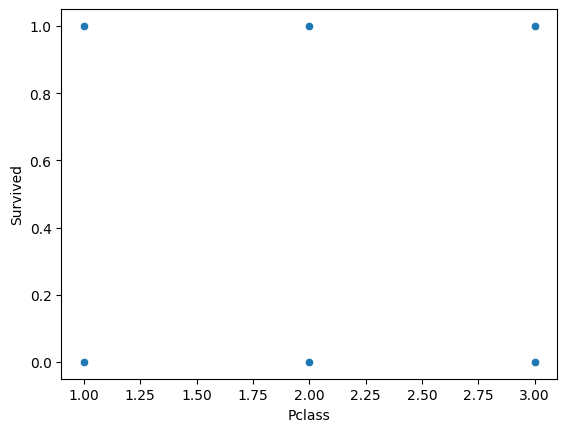

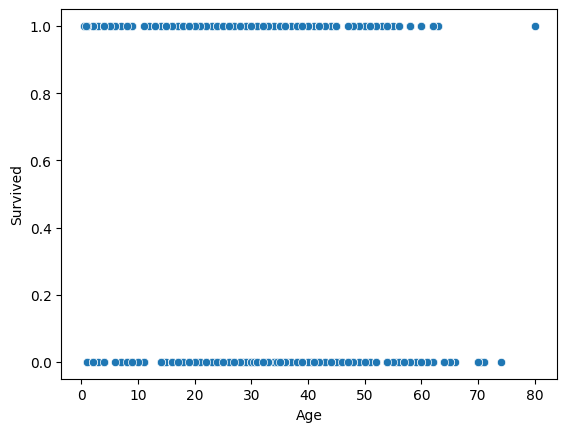

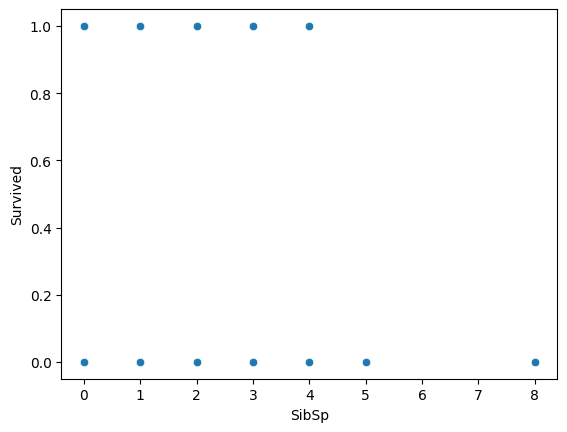

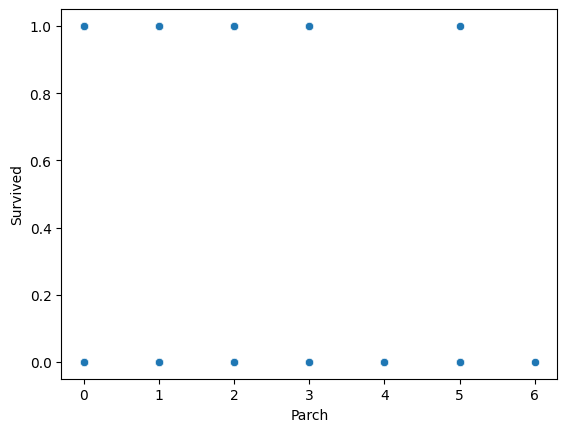

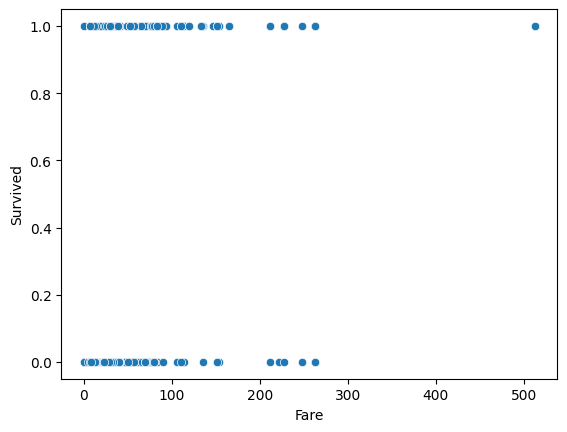

In [16]:
columns = [c for c in df.select_dtypes("number") if c != "Survived" ]
for column in columns:
    sns.scatterplot(data=df, x=column, y="Survived")
    plt.show()

In [17]:
df.select_dtypes("number").corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

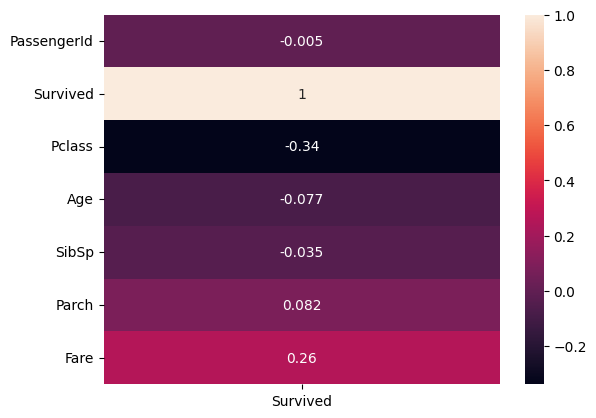

In [18]:
sns.heatmap(df.select_dtypes("number").corr()["Survived"].to_frame(), annot=True)
plt.show()

### Missing values treatments

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# filling wth K-nearest-neighbours
from sklearn.impute import KNNImputer
imputer = KNNImputer()
for i in df.select_dtypes("number").columns:
    df[i] = imputer.fit_transform(df[i].to_frame())

In [21]:
print(df.dtypes["Age"], df.dtypes["Cabin"], df.dtypes["Embarked"])

float64 object object


In [22]:
# filling with mean
for i in ["Age"]:
    df.fillna({i: df[i].median()}, inplace=True)

In [23]:
df = df.drop(columns=["Cabin"])

In [24]:
# filling with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df['Embarked'].to_frame()).ravel()

### Outliers treatment

In [26]:
def wisker(column):
    q1, q3 = np.percentile(column, [25, 75])
    return q1-1.5*(q3-q1), q3+1.5*(q3-q1)

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [28]:
for column in ["Age", "Fare"]:
    lw, up = wisker(df[column])
    df[column] = np.where(df[column] > up, up, df[column])
    df[column] = np.where(df[column] < lw, lw, df[column])

### Encoding

In [29]:
map_dict = {"S": 0, "C": 2, "Q": 3}
df["Embarked"] = df["Embarked"].map(lambda x: map_dict[x])

In [30]:
map_dict = {}
count = 0
for value in df["Ticket"].unique():
    map_dict[value] = count
    count += 1
df["Ticket"] = df["Ticket"].map(lambda x: map_dict[x])

In [31]:
map_dict = {}
count = 0
for value in df["Name"].unique():
    map_dict[value] = count
    count += 1
df["Name"] = df["Name"].map(lambda x: map_dict[x])

In [32]:
map_dict = {"male": 0, "female": 1}
df["Sex"] = df["Sex"].map(lambda x: map_dict[x])

<Axes: >

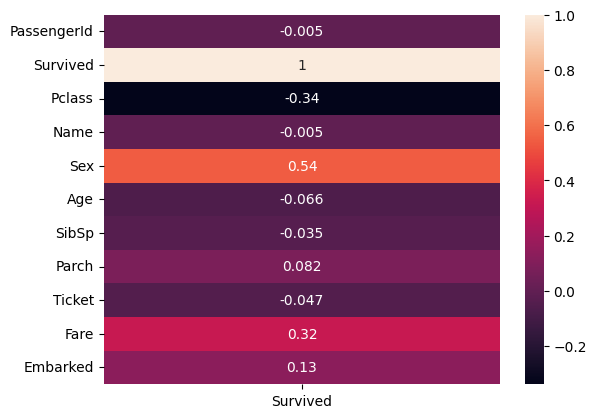

In [33]:
sns.heatmap(df.select_dtypes("number").corr()["Survived"].to_frame(), annot=True)

<Axes: >

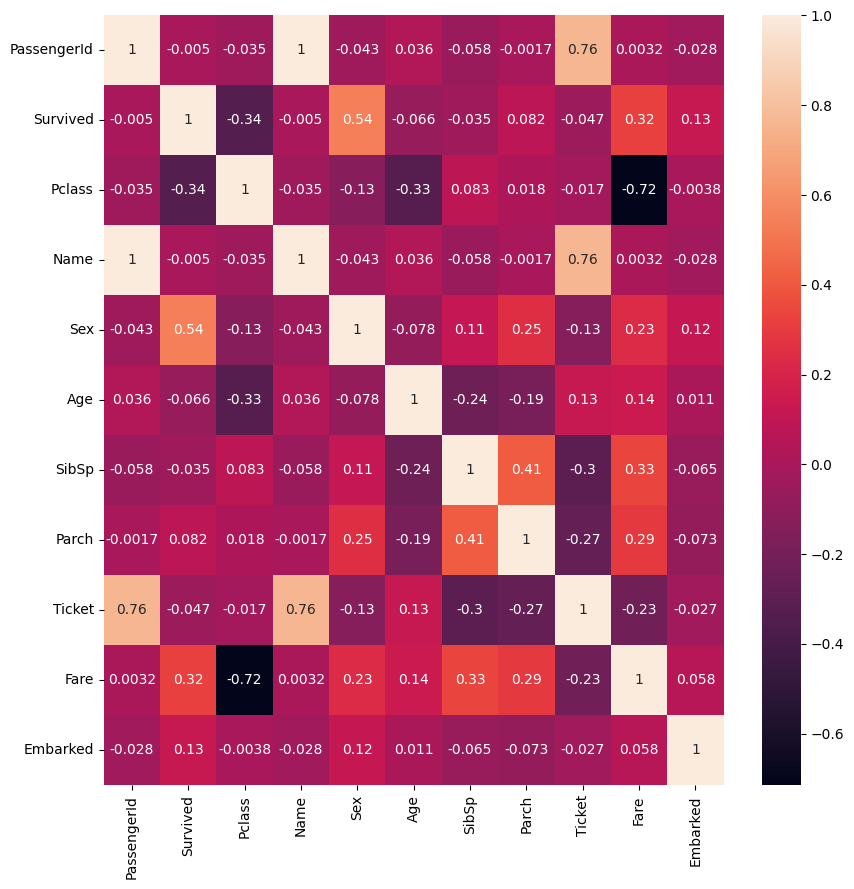

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes("number").corr(), annot=True)

In [35]:
df = df.drop(columns=["PassengerId", "Name", "Fare"])

<Axes: >

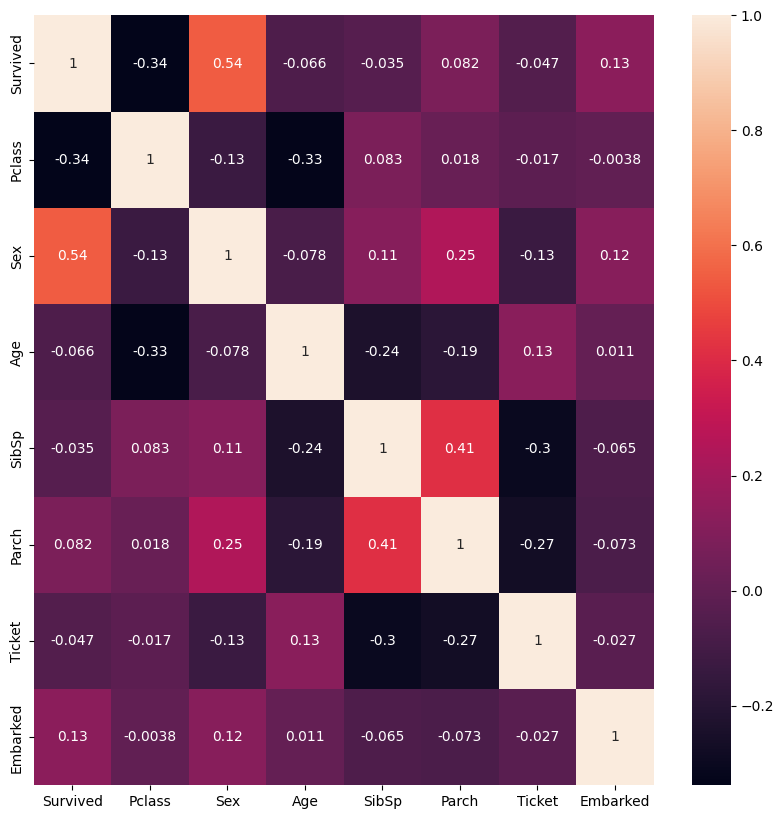

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes("number").corr(), annot=True)